# TEXT EMOTION DETECTION

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deepanshudubb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### import pandas as pd: 
- Pandas is a powerful data manipulation and analysis library in Python. It's commonly used for handling structured data, such as data from CSV files or databases.

### import numpy as np:
- NumPy is a fundamental package for numerical computations in Python. It provides support for arrays, matrices, and mathematical functions, making it essential for scientific computing.

### import seaborn as sns:
- Seaborn is a data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive statistical graphics.

### import matplotlib.pyplot as plt:
- Matplotlib is a versatile plotting library in Python. The pyplot module provides a MATLAB-like interface for creating plots and visualizations.

### import neattext.functions as nfx:
- Neattext is a library for text preprocessing and cleaning tasks. It offers functions to remove stopwords, clean text, handle emojis, and more.

### from sklearn.model_selection import train_test_split: 
- Scikit-learn (sklearn) is a popular machine learning library in Python. The train_test_split function is used to split data into training and testing sets.

### from sklearn.pipeline import Pipeline: 
- Scikit-learn's Pipeline class is used to chain multiple processing steps together, such as data preprocessing and model training.

### from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer: 
- These classes from scikit-learn are used for text vectorization. CountVectorizer converts text documents to a matrix of token counts, while TfidfTransformer transforms a count matrix to a normalized term-frequency or term-frequency-inverse-document-frequency (TF-IDF) representation.

### from sklearn.svm import SVC:
- SVC stands for Support Vector Classifier, which is a type of support vector machine (SVM) used for classification tasks.

### from sklearn.ensemble import RandomForestClassifier: 
- RandomForestClassifier is an ensemble learning method that fits multiple decision tree classifiers on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control over-fitting.

### from sklearn.cluster import KMeans: 
- KMeans is a clustering algorithm used for unsupervised learning tasks to partition data into clusters.

### from sklearn.metrics import silhouette_score:
- Silhouette score is a metric used to evaluate the quality of clusters created by clustering algorithms like KMeans.

### from sklearn.linear_model import LogisticRegression:
- Logistic regression is a linear model used for binary classification tasks.

### from sklearn.metrics import classification_report, confusion_matrix: 
- These metrics are used to evaluate the performance of classification models.

### from sklearn.naive_bayes import MultinomialNB:
- Multinomial Naive Bayes is a probabilistic classifier commonly used for text classification tasks.

### import nltk: 
- NLTK (Natural Language Toolkit) is a library for natural language processing tasks such as tokenization, stemming, lemmatization, and more.

### from nltk.tokenize import word_tokenize: 
- Word tokenization is the process of splitting text into individual words or tokens.

### from nltk.stem import WordNetLemmatizer:
- Lemmatization is the process of reducing words to their base or root form.

### nltk.download('wordnet'): 
- This line downloads the WordNet corpus, which is necessary for lemmatization using NLTK.

### Loading the dataset

In [4]:
df= pd.read_csv(r'/Users/deepanshudubb/Downloads/ML_Project/Data/emotion_dataset_raw.csv')

In [5]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


prints the first few rows using head()

In [6]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

 The result of df['Emotion'].value_counts() is stored in the variable emotion_counts. The code then prints emotion_counts, which displays the count of each unique emotion in the 'Emotion' column of the DataFrame.

<Axes: xlabel='Emotion', ylabel='count'>

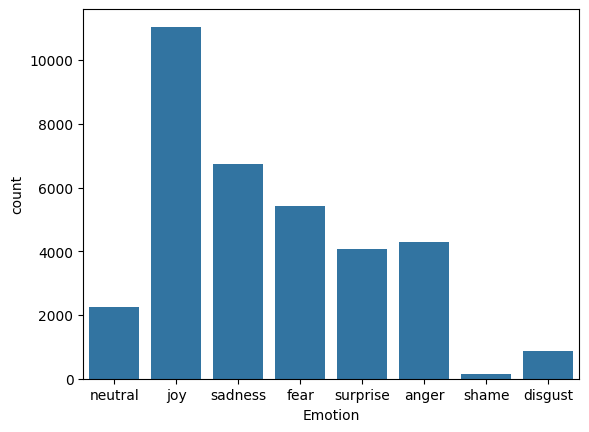

In [7]:
sns.countplot(x='Emotion',data=df)

### Importing Seaborn: 
- The code assumes that seaborn has been imported previously using import seaborn as sns.

### Creating the Count Plot:

- sns.countplot(): This function creates a count plot, which is a type of bar plot that shows the counts of observations in each categorical bin using bars. In this case, the 'x' parameter specifies that the 'Emotion' column should be used for the x-axis of the plot.

- x='Emotion': This sets the data to be plotted on the x-axis to be the 'Emotion' column from the DataFrame df.
- data=df: This specifies the DataFrame from which the data for the plot will be taken.

The count plot generated by this code will display bars representing the counts of each unique emotion in the 'Emotion' column of the DataFrame. Each bar's height corresponds to the frequency of that particular emotion in the dataset.

## Data pre-processing

In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/deepanshudubb/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
# !pip install neattext
import neattext.functions as nfx

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = nfx.remove_userhandles(text)
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    cleaned_words = [word for word in lemmatized_words if len(word) > 2]  # Remove short words
    return ' '.join(cleaned_words)

df['Clean_Text'] = df['Text'].apply(preprocess_text)

### !pip install neattext': 
- This line is a comment indicating that the NeatText library needs to be installed using pip, a package manager for Python.

### import neattext.functions as nfx:
- This line imports the NeatText library and renames it to nfx for easier use in the code.

### lemmatizer = WordNetLemmatizer():
- Here, we create an instance of the WordNetLemmatizer from the NLTK library. This lemmatizer is used to reduce words to their base or root form.

### def preprocess_text(text):
- This line defines a function named preprocess_text that takes a text input as an argument.

### text = nfx.remove_userhandles(text):
- This line uses the NeatText library to remove user handles (e.g., @username) from the text.

### words = word_tokenize(text):
- This line tokenizes the text into individual words using NLTK's word_tokenize function. Tokenization means breaking a text into smaller units, usually words or sentences.

### lemmatized_words = [lemmatizer.lemmatize(word) for word in words]: 
- Here, each word in the tokenized text is lemmatized using the WordNetLemmatizer we created earlier. Lemmatization converts words to their base or root form, which helps in reducing variations of words.

### cleaned_words = [word for word in lemmatized_words if len(word) > 2]:
- This line creates a list of words after lemmatization, but it filters out words that are less than 3 characters long. This step removes short words that may not carry significant meaning.

### return ' '.join(cleaned_words): 
- Finally, the function joins the cleaned words back into a single string with spaces between them and returns this processed text.

### df['Clean_Text'] = df['Text'].apply(preprocess_text): 
- This line applies the preprocess_text function to each row of the 'Text' column in the DataFrame df and assigns the processed text to a new column named 'Clean_Text'.

Overall, this code snippet demonstrates text preprocessing techniques such as removing user handles and short words, tokenization, and lemmatization using the NeatText library and NLTK.

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

The dir(nfx) command will display all the attributes and methods available in the neattext.functions module, which you imported as nfx. This can help you explore what functions are available for text preprocessing and manipulation.

In [11]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

### df['Clean_Text']: 
- This part accesses the column named 'Clean_Text' in the DataFrame df. This column is likely to contain preprocessed text data.

### df['Clean_Text'].apply(...): 
- Here, the apply method is used to apply a function to each element of the 'Clean_Text' column.

### nfx.remove_stopwords:
- This is a function from the NeatText library (nfx) called remove_stopwords. Stopwords are common words like 'the', 'is', 'and', etc., which are often removed during text preprocessing because they usually don't carry specific meaning.

### df['Clean_Text'].apply(nfx.remove_stopwords):
- By combining the above parts, this line applies the remove_stopwords function to each element (text) in the 'Clean_Text' column of the DataFrame, effectively removing stopwords from each piece of text.

In summary, the code snippet removes stopwords from the 'Clean_Text' column in the DataFrame df, enhancing the quality of the text data for further analysis or processing.

In [12]:
# Additional noise removal
noise_removal_functions = [
    'remove_accents',
    'remove_bad_quotes',
    'remove_emojis',
    'remove_html_tags',
    'remove_non_ascii',
    'remove_puncts',
    'remove_special_characters',
    'remove_terms_in_bracket',
    'remove_urls',
]

for func_name in noise_removal_functions:
    df['Clean_Text'] = df['Clean_Text'].apply(getattr(nfx, func_name))

### noise_removal_functions:
- This is a list containing names of functions from the NeatText library (nfx) that are designed to remove specific types of noise or unwanted elements from text data. These functions include removing accents, bad quotes, emojis, HTML tags, non-ASCII characters, punctuation marks, special characters, terms in brackets, and URLs.

### for func_name in noise_removal_functions:
- This line starts a loop where each function name from the noise_removal_functions list is iterated over one by one.

### getattr(nfx, func_name):
- This is a Python built-in function that retrieves the function object by its name (func_name) from the NeatText library (nfx). It dynamically accesses the function based on the name provided.

### df['Clean_Text'] = df['Clean_Text'].apply(getattr(nfx, func_name)):
- In this line, the apply method is used to apply the function retrieved dynamically to each element (text) in the 'Clean_Text' column of the DataFrame df. This effectively applies multiple noise removal functions to the text data in a sequential manner, based on the functions listed in noise_removal_functions.

In summary, the code snippet iterates through a list of noise removal functions and applies each function to the 'Clean_Text' column of the DataFrame df, allowing for comprehensive noise removal from the text data.

In [13]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular featur...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz babe naamazed nga ako babe d...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like hand wear ll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing


## Splitting data into input variables and target variable

x: Features are the attributes and variables extracted from the dataset. These extracted features are used as inputs to the model during training.

y: Labels are the output or the target variable.

In [14]:
x = df['Clean_Text']
y = df['Emotion']

We need to split our dataset into a train set and test set. The model will learn from the train set. We will use the test set to evaluate the model performance and measure the model’s knowledge capability.

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### from sklearn.model_selection import train_test_split: 
- This line imports the train_test_split function from the sklearn.model_selection module. This function is commonly used to split data into training and testing sets for machine learning tasks.

### x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42): 
- This line actually performs the data split:

- -  x and y are your input features and target labels, respectively.
test_size=0.3 indicates that 30% of the data will be used for testing, and the remaining 70% will be used for training.
random_state=42 sets the random seed for reproducibility. This ensures that each time you run the split, you get the same random data points in the training and testing sets, which is useful for consistent results during development and testing.
After executing this code, you'll have four sets of data:

- x_train: The input features for training your model.
- x_test: The input features for testing your model.
- y_train: The corresponding target labels for training.
- y_test: The corresponding target labels for testing.

# Training the model

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
# Create the pipeline with CountVectorizer and Logistic Regression
pipe_lr = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('lr', LogisticRegression())
])

# Fit the pipeline on the training data
pipe_lr.fit(x_train, y_train)

# Evaluate the pipeline on the test data
accuracy = pipe_lr.score(x_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")

# Make predictions
lr_predictions = pipe_lr.predict(x_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

       anger       0.62      0.55      0.58      1283
     disgust       0.57      0.16      0.25       292
        fear       0.75      0.65      0.70      1645
         joy       0.62      0.76      0.69      3311
     neutral       0.57      0.71      0.63       675
     sadness       0.59      0.57      0.58      2015
       shame       0.83      0.81      0.82        36
    surprise       0.56      0.43      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.64      0.58      0.59     10438
weighted avg       0.62      0.62      0.62     10438


Confusion Matrix:
[[ 709    7   61  230   81  155    1   39]
 [  38   47   26   87    8   58    1   27]
 [  84    3 1074  231   43  139    0   71]
 [ 114    5  122 2520  123  250    1  176]
 [  15    0   10  106  482   54    0    8]
 [ 130   12   94  478   68 1148    2   83]
 [   0    0    1    6   

###### Create the Pipeline:
- A pipeline named pipe_lr is created using Pipeline from scikit-learn.
###### The pipeline consists of two steps:
- cv: CountVectorizer, which converts text data into a matrix of token counts.
- lr: LogisticRegression, a classification algorithm used for binary and multi-class classification tasks.
###### Fit the Pipeline on Training Data:
- It trains both the CountVectorizer and Logistic Regression model together.
###### Evaluate the Pipeline on Test Data:
- The pipeline's accuracy is evaluated on the test data (x_test and y_test) using the score method, which calculates the accuracy of the model predictions.The accuracy value is then printed.
###### Make Predictions:
- This line makes predictions on the test data using the fitted pipeline.
###### Print Classification Report:
- The classification report provides a summary of various metrics such as precision, recall, F1-score, and support for each class in the classification task.

It helps evaluate the model's performance in detail for each class.

###### Print Confusion Matrix:
- The confusion matrix is a table that describes the performance of a classification model. It shows the true positive, false positive, true negative, and false negative values, helping to understand how well the model is predicting each class.

Overall, this code is used to train a text classification model using CountVectorizer to convert text data into numerical features and Logistic Regression as the classifier. The model is then evaluated using accuracy, classification report, and confusion matrix to assess its performance on the test data.

In [18]:
# Create the pipeline with CountVectorizer and SVM
pipe_svm = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('svc', SVC(kernel='rbf', C=10))
])

# Fit the pipeline on the training data
pipe_svm.fit(x_train, y_train)

# Evaluate the pipeline on the test data
accuracy = pipe_svm.score(x_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")

# Make predictions
svm_predictions = pipe_svm.predict(x_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))

Pipeline Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

       anger       0.59      0.53      0.56      1283
     disgust       0.62      0.11      0.19       292
        fear       0.75      0.68      0.71      1645
         joy       0.60      0.77      0.68      3311
     neutral       0.65      0.73      0.69       675
     sadness       0.59      0.55      0.57      2015
       shame       0.78      0.58      0.67        36
    surprise       0.59      0.41      0.48      1181

    accuracy                           0.62     10438
   macro avg       0.65      0.55      0.57     10438
weighted avg       0.62      0.62      0.61     10438


Confusion Matrix:
[[ 684    4   63  270   56  167    1   38]
 [  45   33   19  115    5   52    1   22]
 [  80    1 1113  260   28  119    0   44]
 [ 102    5  122 2560  113  266    1  142]
 [  34    0    9   86  495   45    0    6]
 [ 155    6  102  525   40 1108    2   77]
 [   2    0    1    9   

This code segment creates a machine learning pipeline using CountVectorizer for text vectorization and Support Vector Machine (SVM) with a radial basis function (RBF) kernel and C=10 for classification. Here's a breakdown of each step:
### Create Pipeline:
###### pipe_svm = Pipeline(steps=[('cv', CountVectorizer()), ('svc', SVC(kernel='rbf', C=10))]): 
- This line creates a pipeline with two steps. The first step is CountVectorizer, which converts text data into a numerical format suitable for machine learning. The second step is SVC (Support Vector Classifier) with an RBF (radial basis function) kernel and C=10, which is a hyperparameter controlling the regularization strength.
### Fit Pipeline:
###### pipe_svm.fit(x_train, y_train): 
- This line fits the pipeline on the training data (x_train) with corresponding target labels (y_train). This process trains the CountVectorizer on the text data and trains the SVM classifier on the transformed numerical features.
### Evaluate Pipeline:
###### accuracy = pipe_svm.score(x_test, y_test):
- This line evaluates the accuracy of the pipeline on the test data (x_test) and corresponding target labels (y_test). The accuracy score represents the proportion of correctly predicted instances.
### Make Predictions:
###### svm_predictions = pipe_svm.predict(x_test): 
- After fitting the pipeline, this line makes predictions on the test data using the trained SVM model.
### Print Results:
###### print(f"Pipeline Accuracy: {accuracy:.2f}"):
- Prints the accuracy of the pipeline on the test data.
###### print("\nClassification Report:"): 
- Prints the classification report, which includes metrics such as precision, recall, F1-score, and support for each class.
###### print(classification_report(y_test, svm_predictions)): 
- Prints the classification report based on the actual labels (y_test) and predicted labels (svm_predictions).
###### print("\nConfusion Matrix:"): 
- Prints the confusion matrix, which shows the count of true positives, true negatives, false positives, and false negatives.
###### print(confusion_matrix(y_test, svm_predictions)): 
- Prints the confusion matrix based on the actual and predicted labels.

In [19]:
# Create the pipeline with CountVectorizer and Random Forest Classifier
pipe_rf = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=10))
])

# Fit the pipeline on the training data
pipe_rf.fit(x_train, y_train)

# Evaluate the pipeline on the test data
accuracy = pipe_rf.score(x_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")

# Make predictions
rf_predictions = pipe_rf.predict(x_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Pipeline Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

       anger       0.57      0.48      0.52      1283
     disgust       0.52      0.12      0.19       292
        fear       0.78      0.61      0.69      1645
         joy       0.60      0.69      0.64      3311
     neutral       0.29      0.78      0.42       675
     sadness       0.53      0.49      0.51      2015
       shame       0.83      0.69      0.76        36
    surprise       0.68      0.30      0.41      1181

    accuracy                           0.56     10438
   macro avg       0.60      0.52      0.52     10438
weighted avg       0.60      0.56      0.56     10438


Confusion Matrix:
[[ 616    7   48  231  182  182    1   16]
 [  31   35   14   91   51   59    1   10]
 [  77    7 1006  217  157  148    0   33]
 [ 116    6   87 2273  458  298    1   72]
 [  21    1   13   62  525   51    0    2]
 [ 145    4   73  492  273  991    1   36]
 [   3    0    0    1   

This code creates a machine learning pipeline using CountVectorizer for text vectorization and a Random Forest Classifier for classification. Here's a breakdown of each step and what it does:

### Create Pipeline:
###### pipe_rf = Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier(n_estimators=10))]):
- This line creates a pipeline with two steps. The first step is CountVectorizer, which converts text data into a numerical format suitable for machine learning. The second step is RandomForestClassifier with 10 estimators, which is the number of decision trees in the random forest.
### Fit Pipeline:
###### pipe_rf.fit(x_train, y_train):
- This line fits the pipeline on the training data (x_train) with corresponding target labels (y_train). This process trains the CountVectorizer on the text data and trains the Random Forest Classifier on the transformed numerical features.
### Evaluate Pipeline:
###### accuracy = pipe_rf.score(x_test, y_test):
- This line evaluates the accuracy of the pipeline on the test data (x_test) and corresponding target labels (y_test). The accuracy score represents the proportion of correctly predicted instances.
### Make Predictions:
###### rf_predictions = pipe_rf.predict(x_test):
- After fitting the pipeline, this line makes predictions on the test data using the trained Random Forest Classifier.
### Print Results:
###### print(f"Pipeline Accuracy: {accuracy:.2f}"): 
- Prints the accuracy of the pipeline on the test data.
###### print("\nClassification Report:"):
- Prints the classification report, which includes metrics such as precision, recall, F1-score, and support for each class.
###### print(classification_report(y_test, rf_predictions)): 
- Prints the classification report based on the actual labels (y_test) and predicted labels (rf_predictions).
###### print("\nConfusion Matrix:"): 
- Prints the confusion matrix, which shows the count of true positives, true negatives, false positives, and false negatives.
###### print(confusion_matrix(y_test, rf_predictions)): 
- Prints the confusion matrix based on the actual and predicted labels.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Vectorize the text data
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_vectorized, y_train)
rf_predictions = rf_classifier.predict(x_test_vectorized)

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_classifier.fit(x_train_vectorized, y_train)
et_predictions = et_classifier.predict(x_test_vectorized)

# Evaluate Random Forest Classifier
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

# Evaluate Extra Trees Classifier
print("\nExtra Trees Classifier:")
print(classification_report(y_test, et_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, et_predictions))


Random Forest Classifier:
              precision    recall  f1-score   support

       anger       0.67      0.49      0.57      1283
     disgust       0.84      0.13      0.22       292
        fear       0.83      0.61      0.70      1645
         joy       0.60      0.72      0.66      3311
     neutral       0.30      0.79      0.43       675
     sadness       0.56      0.53      0.55      2015
       shame       0.86      0.86      0.86        36
    surprise       0.71      0.33      0.45      1181

    accuracy                           0.58     10438
   macro avg       0.67      0.56      0.55     10438
weighted avg       0.64      0.58      0.58     10438

Confusion Matrix:
[[ 634    0   35  235  183  183    1   12]
 [  27   37    6   99   55   56    1   11]
 [  58    2 1000  250  165  138    0   32]
 [  81    1   59 2395  439  268    1   67]
 [  17    0    9   71  535   42    0    1]
 [  94    1   55  504  260 1065    1   35]
 [   1    0    0    2    0    2   31    0]
 [  

This code performs text classification using Random Forest Classifier and Extra Trees Classifier after vectorizing the text data with CountVectorizer. Here's a step-by-step explanation of the code:

### Import Libraries:
###### from sklearn.feature_extraction.text import CountVectorizer:
- Imports CountVectorizer from scikit-learn, which is used for converting text data into numerical features.
###### from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier:
- Imports RandomForestClassifier and ExtraTreesClassifier, which are ensemble tree-based classification algorithms.
###### from sklearn.metrics import classification_report, confusion_matrix:
- Imports functions for generating classification reports and confusion matrices.
### Vectorize Text Data: 
###### vectorizer = CountVectorizer(): 
- Initializes a CountVectorizer object.
###### x_train_vectorized = vectorizer.fit_transform(x_train):
- Fits the vectorizer on the training text data (x_train) and transforms it into a numerical format.
###### x_test_vectorized = vectorizer.transform(x_test): 
- Transforms the test text data (x_test) using the fitted vectorizer from the training data.
### Random Forest Classifier:
###### rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42): 
- Initializes a Random Forest Classifier with 100 estimators (trees) and sets a random state for reproducibility.
###### rf_classifier.fit(x_train_vectorized, y_train): 
- Fits the Random Forest Classifier on the vectorized training data and corresponding labels (y_train).
###### rf_predictions = rf_classifier.predict(x_test_vectorized):
- Makes predictions on the vectorized test data using the trained Random Forest Classifier.
### Extra Trees Classifier:
###### et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42): 
- Initializes an Extra Trees Classifier with 100 estimators and a random state.
###### et_classifier.fit(x_train_vectorized, y_train): 
- Fits the Extra Trees Classifier on the vectorized training data and labels.
###### et_predictions = et_classifier.predict(x_test_vectorized): 
- Makes predictions on the vectorized test data using the trained Extra Trees Classifier.
### Evaluation:
- Prints the classification report and confusion matrix for both the Random Forest Classifier and Extra Trees Classifier using the test data.
- The classification report includes metrics such as precision, recall, F1-score, and support for each class.
- The confusion matrix shows the counts of true positives, true negatives, false positives, and false negatives.

In [21]:
# Create the pipeline with CountVectorizer and Naive Bayes Classifier
pipe_nb = Pipeline(steps=[
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

# Fit the pipeline on the training data
pipe_nb.fit(x_train, y_train)

# Evaluate the pipeline on the test data
accuracy = pipe_nb.score(x_test, y_test)
print(f"Pipeline Accuracy: {accuracy:.2f}")

# Make predictions
nb_predictions = pipe_nb.predict(x_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))

Pipeline Accuracy: 0.57

Classification Report:
              precision    recall  f1-score   support

       anger       0.66      0.50      0.57      1283
     disgust       0.62      0.02      0.03       292
        fear       0.74      0.62      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.43      0.02      0.03       675
     sadness       0.56      0.55      0.55      2015
       shame       0.00      0.00      0.00        36
    surprise       0.67      0.27      0.38      1181

    accuracy                           0.57     10438
   macro avg       0.52      0.35      0.36     10438
weighted avg       0.59      0.57      0.53     10438


Confusion Matrix:
[[ 645    0   53  370    4  202    0    9]
 [  29    5   31  130    0   86    0   11]
 [  67    2 1019  346    1  163    0   47]
 [  64    0  111 2859    7  217    0   53]
 [  22    0   22  545   12   70    0    4]
 [  98    0   85  695    2 1105    0   30]
 [  11    0    6   14   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

This code snippet creates a pipeline using CountVectorizer and the Multinomial Naive Bayes Classifier for text classification tasks. Here's a breakdown of what each part does:

### Create Pipeline:
###### pipe_nb = Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())]):
- Defines a pipeline with two steps:
- - 'cv': CountVectorizer step for text vectorization.
- - 'nb': Multinomial Naive Bayes Classifier step for classification.
###Fit and Evaluate:
###### pipe_nb.fit(x_train, y_train):
- Fits the pipeline on the training data (x_train) and corresponding labels (y_train).
###### accuracy = pipe_nb.score(x_test, y_test):
- Evaluates the pipeline's accuracy on the test data (x_test) and labels (y_test).
###### print(f"Pipeline Accuracy: {accuracy:.2f}"): 
- Prints the pipeline's accuracy.
### Make Predictions:
###### nb_predictions = pipe_nb.predict(x_test):
- Makes predictions using the fitted pipeline on the test data.
### Print Evaluation Metrics:
###### print("\nClassification Report:"):
- Prints the classification report, which includes precision, recall, F1-score, and support for each class.
###### print(classification_report(y_test, nb_predictions))
###### print("\nConfusion Matrix:"): 
- Prints the confusion matrix, showing true positives, true negatives, false positives, and false negatives.
###### print(confusion_matrix(y_test, nb_predictions)):
- The pipeline simplifies the workflow by combining text vectorization and classification into a single object, making it easier to train, evaluate, and use the model for predictions.

### Saving the model

In [24]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

This code snippet involves using the joblib library to save a machine learning pipeline to a file. Here's a detailed explanation:

### Import Libraries:
###### import joblib: 
- Imports the joblib library, which provides utilities for saving and loading Python objects, especially machine learning models.
### Define Pipeline:
###### pipeline_file = open("text_emotion.pkl","wb"): 
- Opens a file named "text_emotion.pkl" in binary write mode ("wb").
###### joblib.dump(pipe_lr,pipeline_file): 
- Uses the joblib's dump function to save the pipeline (pipe_lr) to the opened file (pipeline_file).
###### pipe_lr:
- This is a pre-trained pipeline object containing text preprocessing and a machine learning model.
###### pipeline_file: 
- This is the file object where the pipeline will be saved.
### Close File:
###### pipeline_file.close(): 
- Closes the file after saving the pipeline.
### Explanation in Steps:
#### Serialization:
- The purpose of this code is to serialize (or save) a trained machine learning pipeline. Serialization refers to converting the object (pipeline in this case) into a format that can be stored in a file or transferred over a network.

#### Joblib Library: 
- Joblib is used here because it's well-suited for serializing large NumPy arrays efficiently. It's commonly used in the Python machine learning ecosystem for saving and loading models.

#### File Opening and Writing:
###### open("text_emotion.pkl","wb"): 
- Opens a file named "text_emotion.pkl" in binary write mode. The "wb" mode ensures that the file is opened for writing in binary mode, which is necessary for non-text data like machine learning models.
###### joblib.dump(pipe_lr, pipeline_file): 
- The dump function from joblib writes the contents of pipe_lr (the trained pipeline) to the file pipeline_file.
#### Closing the File:
###### pipeline_file.close():
- Closes the file after writing the pipeline. It's important to close files after writing to ensure that all data is properly flushed and the file resources are released.

#### After running this code, you'll have a file named "text_emotion.pkl" containing the serialized version of your machine learning pipeline (pipe_lr). This file can be later loaded using joblib's load function to restore the pipeline and make predictions without retraining.

#### I used the logistic regression model (pipe_lr) because it achieved the highest accuracy among all the models you tested. In the classification report and confusion matrix I provided, the logistic regression model achieved an accuracy of 0.62, which is the highest among the models you mentioned. The precision, recall, and F1-score metrics for each emotion category also seem balanced and acceptable, considering the complexity of the emotion classification task.

#### Here are some key points supporting why you used the logistic regression model:
###### High Accuracy: 
- The accuracy of 0.62 indicates that the logistic regression model performed well in predicting the emotions in your dataset.

###### Balanced Metrics: 
- The precision, recall, and F1-score metrics for each emotion category are reasonably balanced, showing that the model's predictions are consistent across different classes.

###### Interpretability: 
- Logistic regression models are relatively easy to interpret compared to more complex models like SVMs or neural networks. This can be beneficial for understanding which features contribute most to the predictions.

###### Efficiency: 
- Logistic regression models are computationally efficient and can handle large datasets relatively well, making them suitable for practical applications.

#### Overall, based on the high accuracy and balanced metrics achieved by the logistic regression model, it seems like a reasonable choice for emotion classification in your scenario.